In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import matplotlib.pyplot as plt


# Data Preparation 

In [2]:
data: pd.DataFrame = pd.read_csv("data.csv", index_col=0)
print(data.head())

          y        x1        x2        x3        x4        x5        x6  \
0  7.824944 -0.887890  0.949137  0.867185  0.905457 -0.564753  1.064772   
1 -0.284809  0.402109 -0.109812  0.353789 -0.368996  0.484929 -0.872589   
2 -5.551631 -0.114545 -1.603722  0.284455 -0.276847 -1.421414 -1.135600   
3  0.087262  0.832631  0.443724  0.472880  1.260798  0.589971 -0.150165   
4  0.169201  0.318175 -0.042458  0.014656  0.323378  0.425665  0.268726   

         x7        x8        x9       x10  
0  0.871957  0.073367 -0.468684 -1.518201  
1 -0.305881 -0.284581  0.547374 -0.755235  
2 -0.021529 -0.826239  0.647715 -2.370580  
3  1.148314  1.034029 -0.205375 -0.488831  
4  0.177851 -0.128694  0.110501  0.797469  


### Displaying X1-X5:

In [6]:
data_copy = data.copy()
X  = data_copy['x1']
y = data_copy['y']

X2 = data_copy['x2']
y2 = data_copy['y']

X3 = data_copy['x3']
y3 = data_copy['y']

X4 = data_copy['x4']
y4 = data_copy['y']

X5 = data_copy['x5']
y5 = data_copy['y']

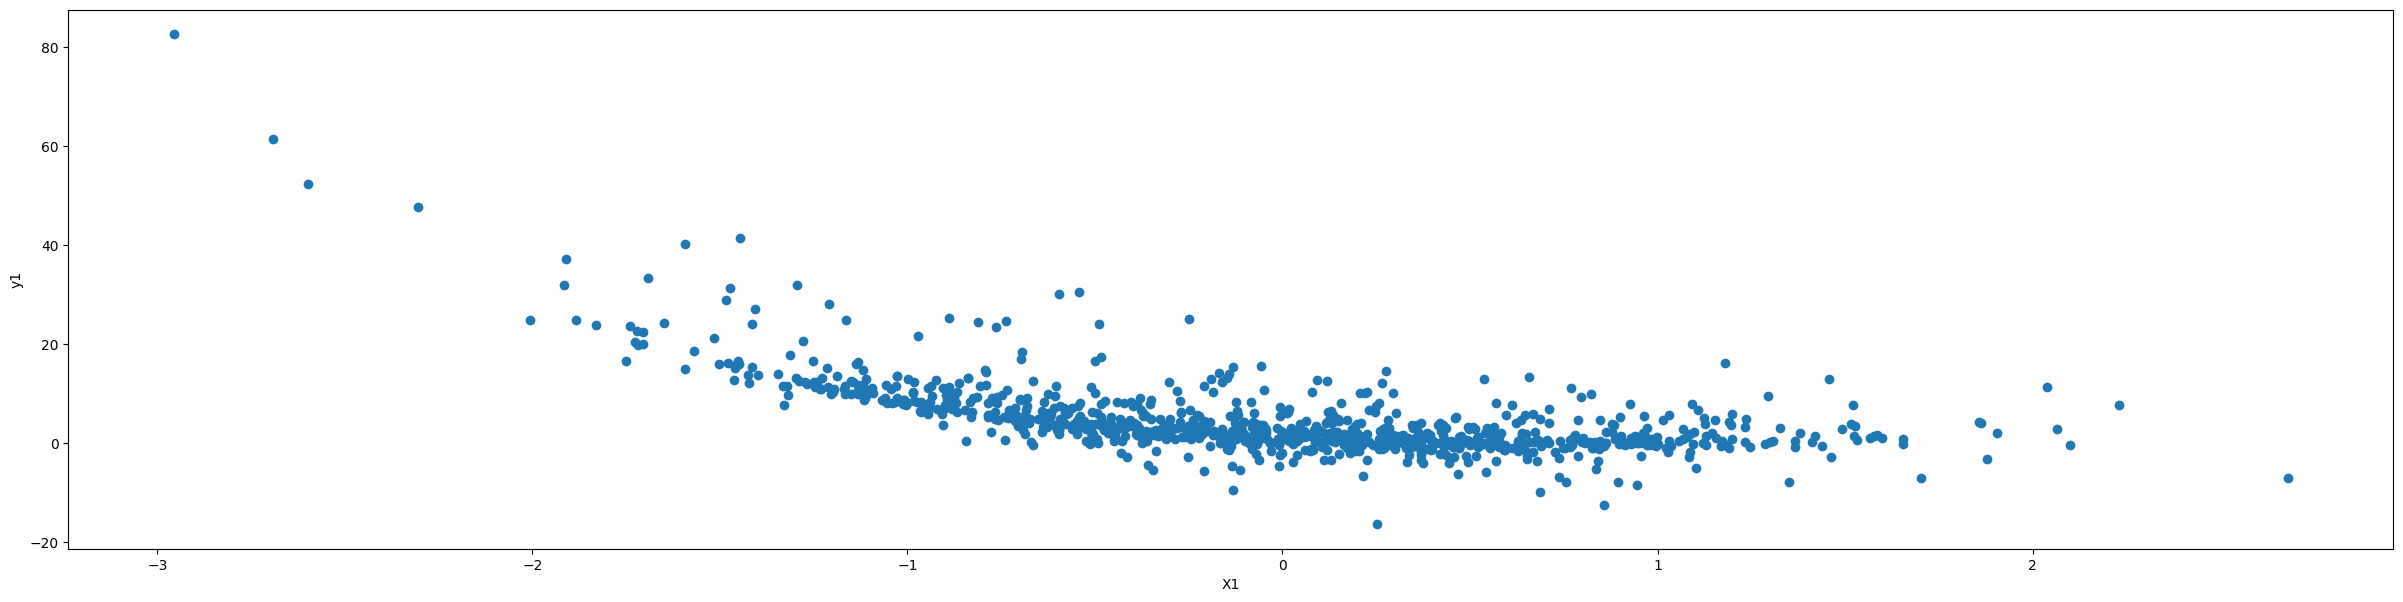

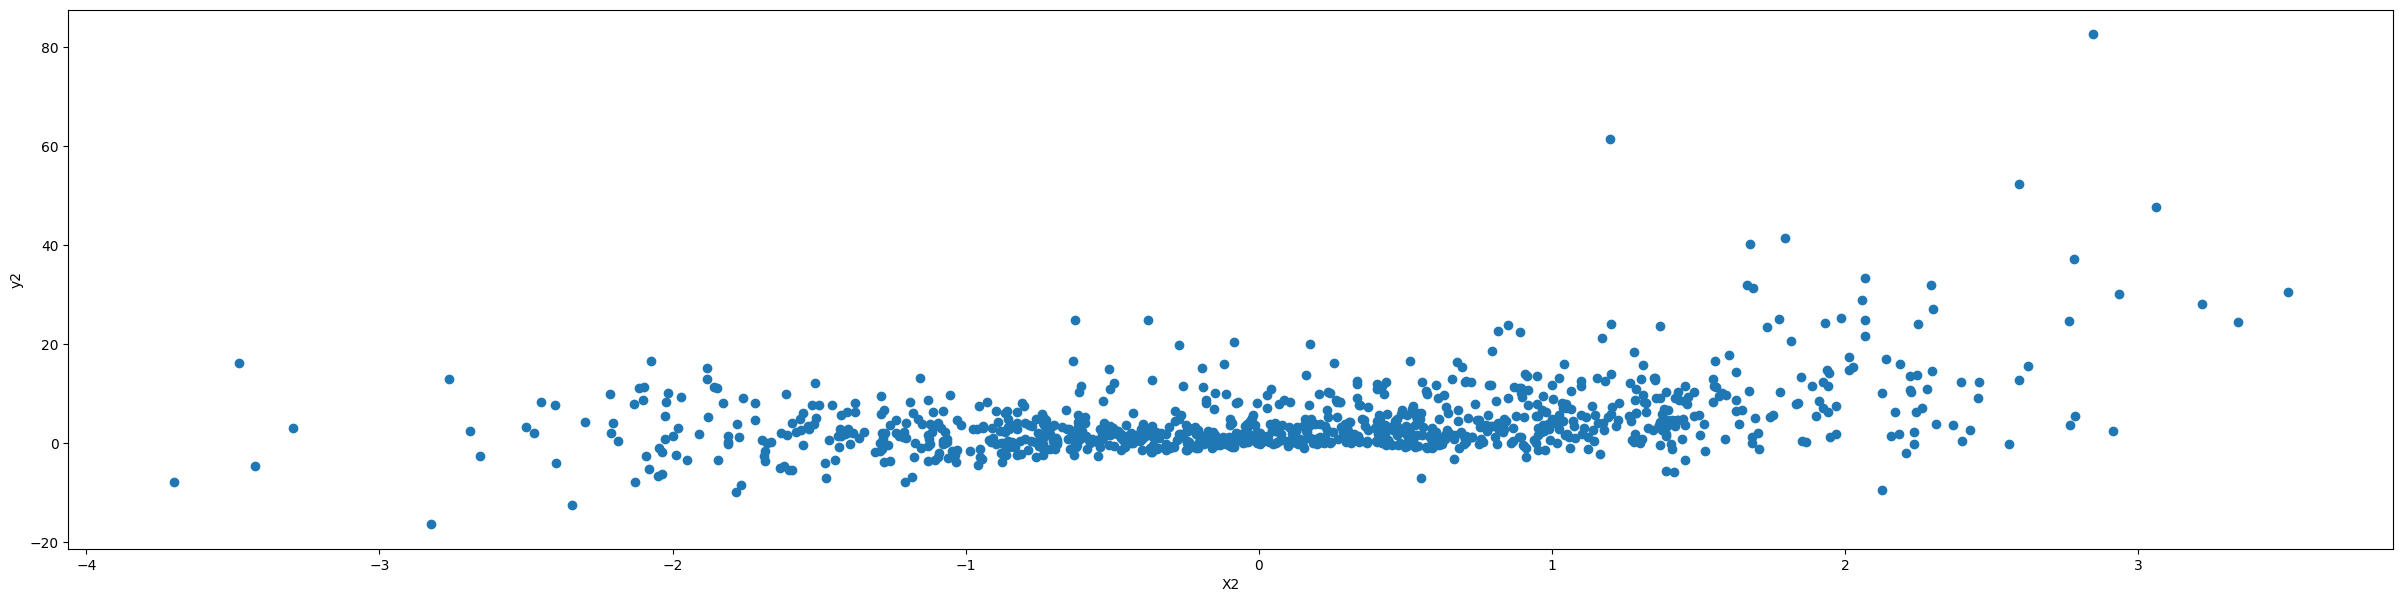

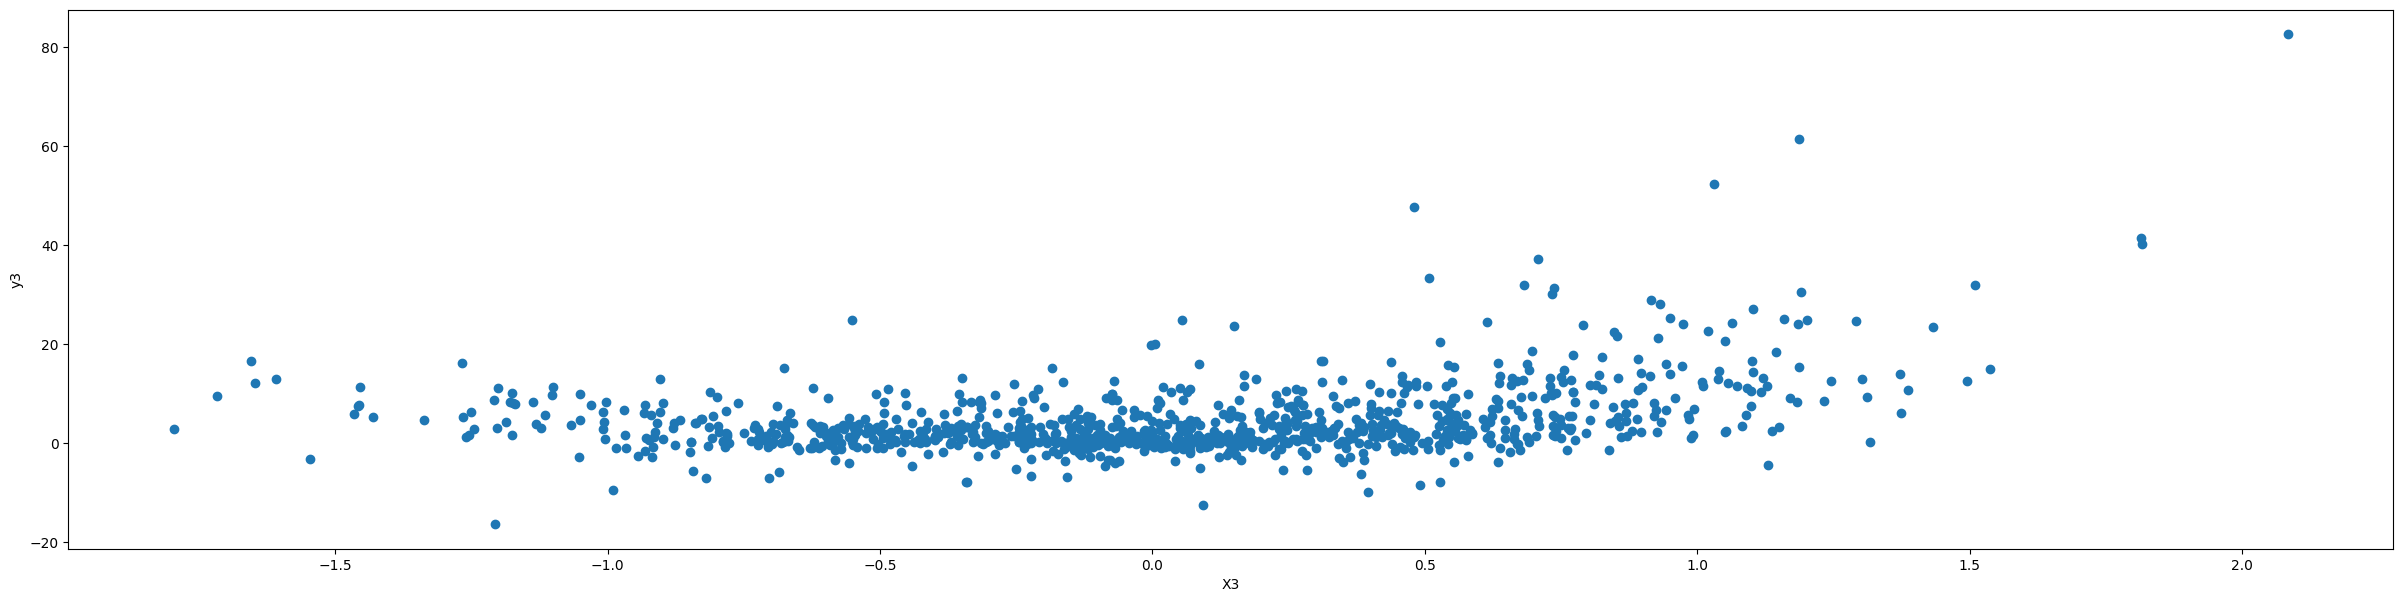

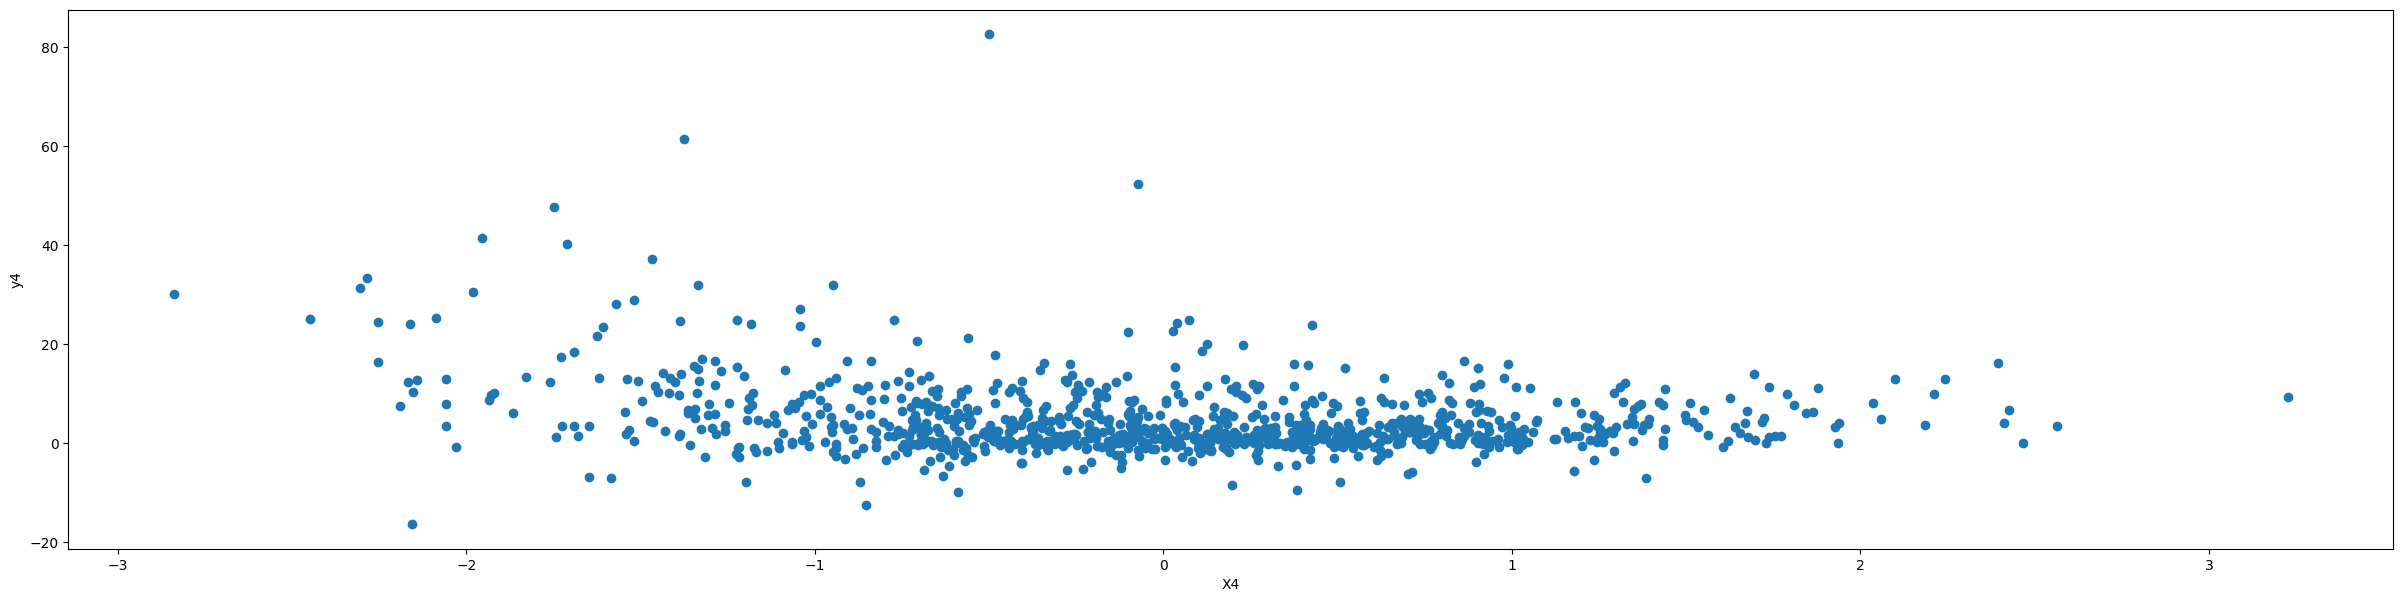

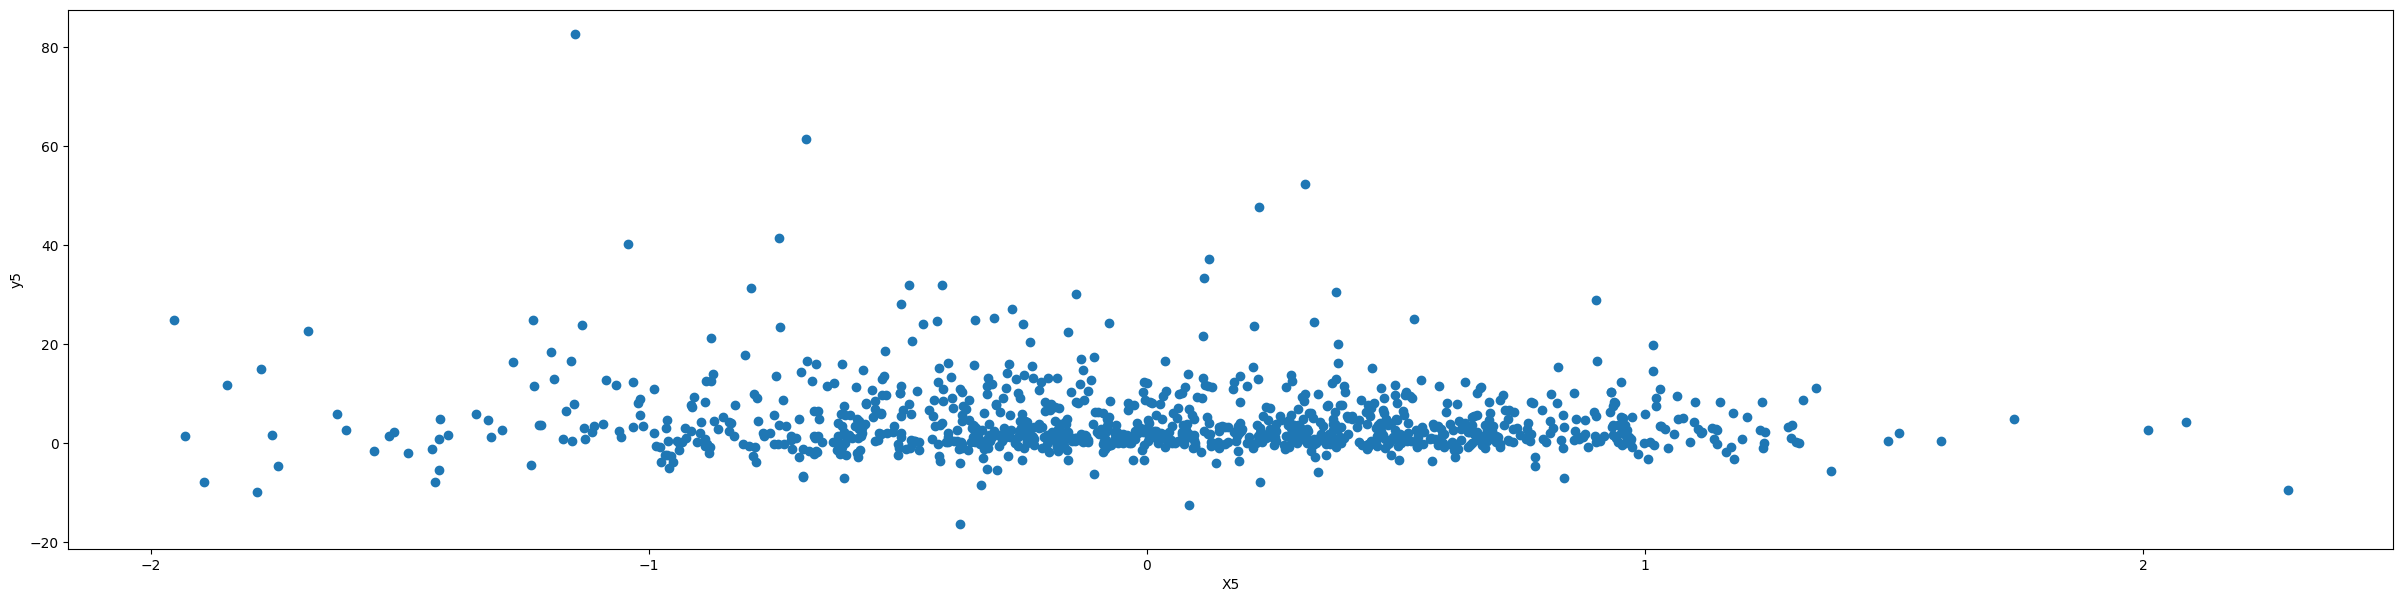

In [7]:
plt.figure(figsize = (30,7))
plt.scatter(X, y)
plt.xlabel("X1")
plt.ylabel("y1")
plt.show()

plt.figure(figsize = (30,7))
plt.scatter(X2, y2)
plt.xlabel("X2")
plt.ylabel("y2")
plt.show()

plt.figure(figsize = (30,7))
plt.scatter(X3, y3)
plt.xlabel("X3")
plt.ylabel("y3")
plt.show()

plt.figure(figsize = (30,7))
plt.scatter(X4, y4)
plt.xlabel("X4")
plt.ylabel("y4")
plt.show()

plt.figure(figsize = (30,7))
plt.scatter(X5, y5)
plt.xlabel("X5")
plt.ylabel("y5")
plt.show()

In [4]:
#fn Creating train and test data
def splitting_datasets(X, y):
    splitter = int(0.8*len(X))
    X_train, y_train = X[:splitter],y[:splitter]
    X_test, y_test = X[splitter:], y[splitter:]

    # print(f"Train Length: {len(X_train)}")
    # print(f"Test Length: {len(X_test)}")


    X_test=torch.tensor(X_test.values)
    y_test = torch.tensor(y_test.values)
    X_train= torch.tensor(X_train.values)
    y_train=torch.tensor(y_train)
    return X_test, X_train, y_test, y_train



In [8]:
X_test, X_train, y_test, y_train = splitting_datasets(X, y)
X2_test, X2_train, y2_test, y2_train = splitting_datasets(X2,y2)
X3_test, X3_train, y3_test, y3_train = splitting_datasets(X3,y3)
X4_test, X4_train, y4_test, y4_train = splitting_datasets(X4,y4)
X5_test, X5_train, y5_test, y5_train = splitting_datasets(X5,y5)




# print(f"{X1_test.dtype}")
# print(f"{y1_test.dtype}")
# print(f"{X1_train.dtype}")
# print(f"{y1_train.dtype}")

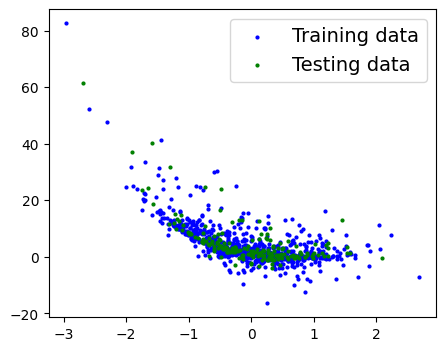

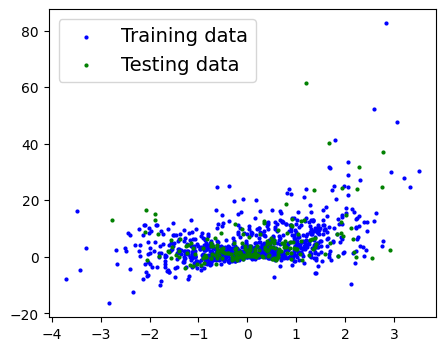

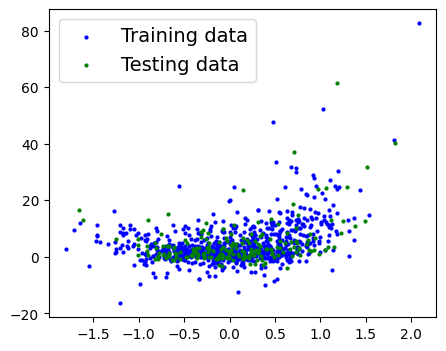

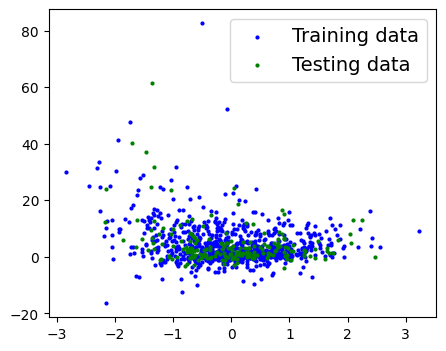

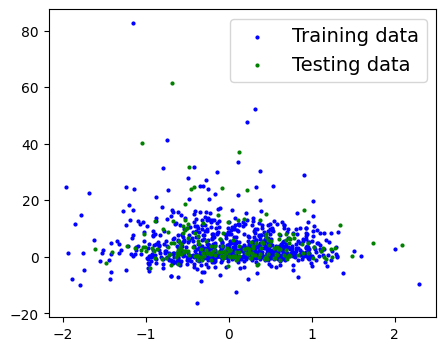

In [9]:
def plot_predictions(train_data: torch.Tensor,
                     train_labels: torch.Tensor,
                     test_data: torch.Tensor,
                     test_labels: torch.Tensor,
                     predictions: torch.Tensor = None):
    plt.figure(figsize=(5, 4))

    plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
    
    plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

    if predictions is not None:
        plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")
        
    plt.legend(prop={"size": 14});

plot_predictions(train_data=X_train, train_labels=y_train, test_data=X_test, test_labels=y_test)
plot_predictions(train_data=X2_train, train_labels=y2_train, test_data=X2_test, test_labels=y2_test)
plot_predictions(train_data=X3_train, train_labels=y3_train, test_data=X3_test, test_labels=y3_test)
plot_predictions(train_data=X4_train, train_labels=y4_train, test_data=X4_test, test_labels=y4_test)
plot_predictions(train_data=X5_train, train_labels=y5_train, test_data=X5_test, test_labels=y5_test)




# Model preparation, training, evaluation and prediction

### Building Model 1:

In [10]:
#using Polynomial Regression Model
import torch
import torch.nn as nn
class PolynomialRegressionModel(nn.Module):
    def __init__(self, *args, **kwargs) -> None:
        super().__init__(*args, **kwargs)
        self.a = nn.Parameter(torch.randn(1, 
            requires_grad=True, 
            dtype=torch.float32 
        ))
        self.b = nn.Parameter(torch.randn(1, 
            requires_grad=True, 
            dtype=torch.float32 
        ))
        self.c = nn.Parameter(torch.randn(1, 
            requires_grad=True, 
            dtype=torch.float32 
        ))

    def forward(self, x: torch.Tensor):
        y = (x**2 )*self.a + x*self.b + self.c #quadratic formula: y=ax^2+bx+c
        return y


In [11]:
model_1 = PolynomialRegressionModel()
print(f"Model_1 Parameters: {list(model_1.parameters())}")
print('-------------------------')
print(f"Named Parameters: {model_1.state_dict()}")

Model_1 Parameters: [Parameter containing:
tensor([0.2046], requires_grad=True), Parameter containing:
tensor([0.6574], requires_grad=True), Parameter containing:
tensor([-0.9482], requires_grad=True)]
-------------------------
Named Parameters: OrderedDict([('a', tensor([0.2046])), ('b', tensor([0.6574])), ('c', tensor([-0.9482]))])


In [12]:
#predicting y values (from polynomial equation)
with torch.inference_mode():
    y_preds = model_1(X_test)

print(f"Predicted values: {y_preds}")

with torch.inference_mode():
    y3_preds = model_1(X3_test)

print(f"Predicted values: {y3_preds}")

with torch.inference_mode():
    y4_preds = model_1(X4_test)

print(f"Predicted values: {y4_preds}")

Predicted values: tensor([-1.1880, -1.4758, -1.2434, -0.9564, -0.9463, -1.1005, -0.6249,  0.1746,
        -0.8415, -0.6836,  0.4455, -0.8656, -1.1706, -0.3106, -1.4339, -0.3945,
        -0.7862, -0.5621, -0.0905, -1.3743, -0.5924, -0.9399, -0.7645, -0.5513,
        -1.1882, -0.6223, -1.3183, -1.0936, -0.8596, -1.3967, -0.8168, -0.8285,
        -0.7215, -0.0888, -1.2806, -0.9338, -0.2293,  0.1734,  0.0554, -0.8057,
        -1.4226, -0.5921, -0.6877, -1.3318, -0.7323, -1.0181, -1.2429, -1.3320,
        -0.6965, -1.2148, -1.1012, -0.1221, -1.2820, -1.2067, -1.3386, -1.4273,
        -1.3217, -1.4762, -1.2385, -1.3917, -0.9495, -1.2974, -1.1742, -0.9450,
        -0.4008, -1.1266, -1.2656, -0.7071, -0.8200, -1.0659, -1.0814, -0.8389,
        -0.8097, -0.8568, -0.6589, -0.8971, -1.2215, -1.1026, -0.8732, -1.1012,
        -1.4448, -0.7520,  0.1249, -0.9870,  0.5304, -0.9818, -0.7726, -0.9821,
        -0.9291, -1.3369, -1.0414, -1.0363, -0.4900,  0.1774, -1.2211, -1.1034,
        -0.7627, -0.73

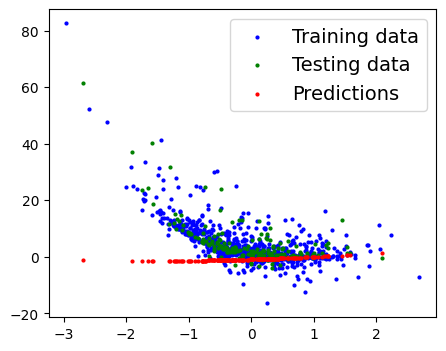

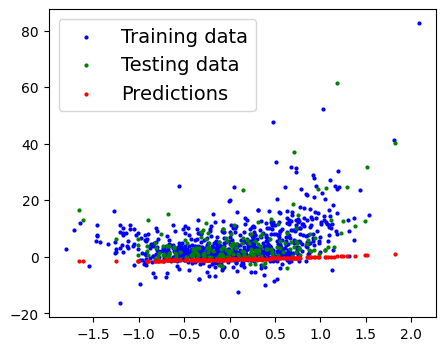

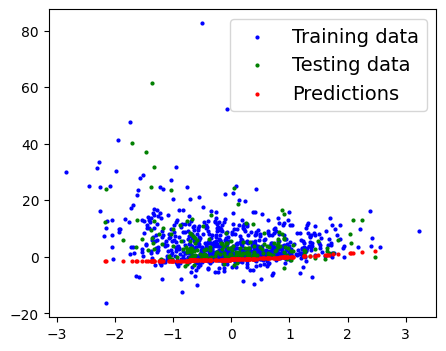

In [13]:
plot_predictions(X_train, y_train, X_test, y_test, y_preds)
plot_predictions(X3_train,y3_train, X3_test, y3_test, y3_preds)
plot_predictions(X4_train,y4_train, X4_test, y4_test, y4_preds)


### Creating loss function 

In [15]:
loss_function = nn.MSELoss() # Mean Absolute Error

In [16]:
optimizer = torch.optim.SGD(model_1.parameters(),lr=0.001,)

In [17]:
def train(
        model: nn.Module,
        train_data: torch.Tensor,
        train_labels: torch.Tensor,
        test_data: torch.Tensor,
        test_labels: torch.Tensor,
        loss_function: nn.Module,
        optimizer: torch.optim.Optimizer,
        epochs: int,
    ):
    epochs_count ,train_loss_arr, test_loss_arr = [], [], []
    for epoch in range(epochs+1):
        model.train()
        y_pred = model(train_data)
        loss = loss_function(y_pred, train_labels)
        loss.backward()

        optimizer.step()
        optimizer.zero_grad()

        model.eval()
        with torch.inference_mode():
            y_pred = model(test_data)
            test_loss = loss_function(y_pred, test_labels)

        if epoch % 10 == 0:
            epochs_count.append(epoch)
            train_loss_arr.append(loss.detach().numpy())
            test_loss_arr.append(test_loss.detach().numpy())
            print(f"Epoch {epoch}: MAE Loss: {loss.item():0.2f} | Test Loss: {test_loss.item():0.2f}")
    return epochs_count, train_loss_arr, test_loss_arr


In [18]:

epochs_count, train_loss, test_loss = train(
                                        model_1, 
                                        train_data=X_train, 
                                        train_labels=y_train, 
                                        test_data=X_test, 
                                        test_labels=y_test, 
                                        loss_function=loss_function, 
                                        optimizer=optimizer, 
                                        epochs=1000
                                    )

epochs_count, train_loss, test_loss = train(
                                        model_1, 
                                        train_data=X3_train, 
                                        train_labels=y3_train, 
                                        test_data=X3_test, 
                                        test_labels=y3_test, 
                                        loss_function=loss_function, 
                                        optimizer=optimizer, 
                                        epochs=1000
                                    )

epochs_count, train_loss, test_loss = train(
                                        model_1, 
                                        train_data=X4_train, 
                                        train_labels=y4_train, 
                                        test_data=X4_test, 
                                        test_labels=y4_test, 
                                        loss_function=loss_function, 
                                        optimizer=optimizer, 
                                        epochs=1000
                                    )


Epoch 0: MAE Loss: 82.53 | Test Loss: 87.26
Epoch 10: MAE Loss: 79.29 | Test Loss: 83.92
Epoch 20: MAE Loss: 76.24 | Test Loss: 80.75
Epoch 30: MAE Loss: 73.37 | Test Loss: 77.77
Epoch 40: MAE Loss: 70.66 | Test Loss: 74.94
Epoch 50: MAE Loss: 68.11 | Test Loss: 72.27
Epoch 60: MAE Loss: 65.71 | Test Loss: 69.74
Epoch 70: MAE Loss: 63.44 | Test Loss: 67.35
Epoch 80: MAE Loss: 61.30 | Test Loss: 65.09
Epoch 90: MAE Loss: 59.28 | Test Loss: 62.95
Epoch 100: MAE Loss: 57.38 | Test Loss: 60.92
Epoch 110: MAE Loss: 55.58 | Test Loss: 59.00
Epoch 120: MAE Loss: 53.88 | Test Loss: 57.18
Epoch 130: MAE Loss: 52.28 | Test Loss: 55.45
Epoch 140: MAE Loss: 50.76 | Test Loss: 53.81
Epoch 150: MAE Loss: 49.33 | Test Loss: 52.26
Epoch 160: MAE Loss: 47.98 | Test Loss: 50.79
Epoch 170: MAE Loss: 46.70 | Test Loss: 49.39
Epoch 180: MAE Loss: 45.49 | Test Loss: 48.06
Epoch 190: MAE Loss: 44.34 | Test Loss: 46.80
Epoch 200: MAE Loss: 43.25 | Test Loss: 45.60
Epoch 210: MAE Loss: 42.23 | Test Loss: 44.46

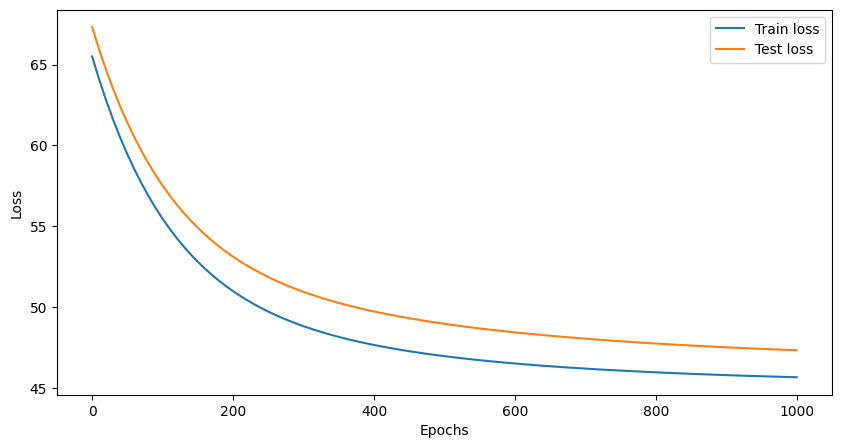

In [19]:
def plot_stats(
        epochs: list,
        train_loss: list,
        test_loss: list,
    ):
    plt.figure(figsize=(10, 5))
    plt.plot(epochs, train_loss, label='Train loss')
    plt.plot(epochs, test_loss, label='Test loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

plot_stats(epochs_count, train_loss, test_loss)


In [20]:
def predict(model, X):
    with torch.inference_mode():
        y_pred = model(X)
        return y_pred
    
y_preds = predict(model_1, X_test)
print(f"Predicted values: {y_preds}")
y3_preds = predict(model_1, X3_test)
print(f"Predicted values: {y3_preds}")
y4_preds = predict(model_1, X4_test)
print(f"Predicted values: {y4_preds}")

Predicted values: tensor([ 3.2669, 10.2896,  3.6640,  2.3890,  2.3699,  2.8169,  2.2521,  4.1713,
         2.2365,  2.2160,  5.2071,  2.2575,  3.1626,  2.7423,  6.6534,  2.5694,
         2.2076,  2.3128,  3.3100,  5.2314,  2.2808,  2.3585,  2.2030,  2.3253,
         3.2683,  2.2542,  4.4109,  2.7886,  2.2518,  5.6693,  2.2204,  2.2274,
         2.2042,  3.3151,  3.9975,  2.3480,  2.9341,  4.1670,  3.7629,  2.2149,
         6.3066,  2.2811,  2.2143,  4.5823,  2.2027,  2.5340,  3.6594,  4.5840,
         2.2109,  3.4462,  2.8199,  3.2196,  4.0112,  3.3897,  4.6735,  6.4439,
         4.4520,  9.8198,  3.6245,  5.5643,  2.3759,  4.1713,  3.1834,  2.3675,
         2.5576,  2.9328,  3.8554,  2.2076,  2.2222,  2.6843,  2.7410,  2.2346,
         2.2168,  2.2492,  2.2286,  2.2932,  3.4945,  2.8259,  2.2652,  2.8198,
         7.0550,  2.2020,  3.9972,  2.4547,  5.5586,  2.4426,  2.2043,  2.4433,
         2.3401,  4.6510,  2.6026,  2.5870,  2.4074,  4.1812,  3.4912,  2.8293,
         2.2028,  2.20

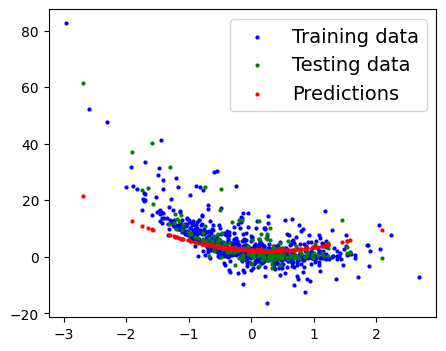

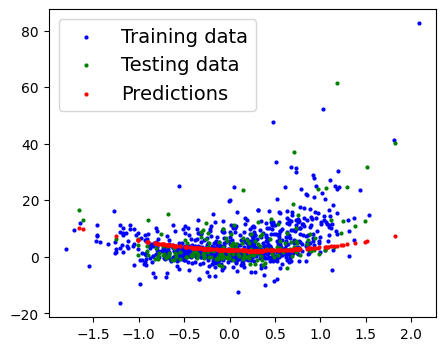

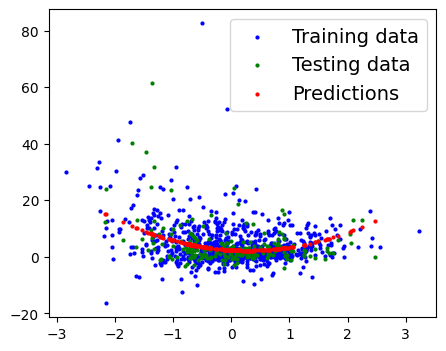

In [21]:
plot_predictions(
    train_data=X_train,
    train_labels=y_train,
    test_data=X_test,
    test_labels=y_test,
    predictions=y_preds,
)

plot_predictions(
    train_data=X3_train,
    train_labels=y3_train,
    test_data=X3_test,
    test_labels=y3_test,
    predictions=y3_preds,
)

plot_predictions(
    train_data=X4_train,
    train_labels=y4_train,
    test_data=X4_test,
    test_labels=y4_test,
    predictions=y4_preds,
)


In [22]:
print(f"Model Parameters: {model_1.state_dict()}")

Model Parameters: OrderedDict([('a', tensor([2.1689])), ('b', tensor([-1.2196])), ('c', tensor([2.3733]))])


In [ ]:
# Saving model1
from pathlib import Path

# Create a folder to save our models
model_path = Path('ML Task 1 Asmaa')
model_path.mkdir(parents=True, exist_ok=True)

# Save the model
model_name = 'model_1.pth'
model_save_path = model_path / model_name

print(f"Saving model to: {model_save_path}")
torch.save(model_1.state_dict(), model_save_path)

## Building Model 2

In [23]:
#using Linear Regression Model
import torch
import torch.nn as nn
class LinearRegressionModel(nn.Module):
    def __init__(self, *args, **kwargs) -> None:
        super().__init__(*args, **kwargs)
        self.slope = nn.Parameter(torch.randn(1, 
            requires_grad=True, 
            dtype=torch.float32 
        ))
        self.intercept = nn.Parameter(torch.randn(1, 
            requires_grad=True, 
            dtype=torch.float32 
        ))
    def forward(self, x: torch.Tensor):
        y = x*self.slope+self.intercept #linear formula: y=mx+c
        return y